# Introduction to Plotterator

#        Line Plots


This notebook is to teach you how to create a line plot in Plotterator.

Setting up imports

In [1]:
import os
import sys

#For random data creation
import numpy as np
import pandas as pd

#if not hasattr(sys, 'frozen'):
#    RELATIVE_LIB_PATH = ''
#    while os.path.basename(RELATIVE_LIB_PATH) != 'src':
#        if not RELATIVE_LIB_PATH:
#            RELATIVE_LIB_PATH = os.path.dirname(os.path.dirname(os.path.realpath(__file__)))
#        else:
#            RELATIVE_LIB_PATH = os.path.dirname(RELATIVE_LIB_PATH)
#        if __name__ == '__main__':
#            sys.path.append(RELATIVE_LIB_PATH)
#            sys.path.pop(0)
#else:
#    RELATIVE_LIB_PATH = os.path.dirname(sys.executable)

#For my use
RELATIVE_LIB_PATH = os.environ.get('DEV_DIR')
sys.path.append(RELATIVE_LIB_PATH)
sys.path.pop(0)

from PlotH5 import Plotterator

C:\Repository\analytix\tools\src\PlotH5\Plotterator.py:100: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use(STYLE_SHEET)


First we will make some random data and stick it into a dataframe.
The data will consist of the following:

A particle being launched from the ground with initial position (0m,0m) and initial velocity (80m/s,500m/s)

Time - 500 points from 0 to 100 seconds

YPos - 500 points of the object's y position in meters

XPos - 500 points of the object's x position in meters

YVel - 500 points of the object's y-speed in m/s

XVel - 500 points of the object's x-speed in m/s

YAcc - 500 points of the object's y-acceleration in m/s^2

XAcc - 500 points of the object's x-acceleration in m/s^2

Trajectory - 500 points of the object's trajectory in meters

This is neglecting air resistance and assuming uniform gravity in case you were wondering.  Physics 101

In [2]:
x_i = 0
y_i = 0
vx_i = 80
vy_i = 500
launchAngle = np.arccos(vx_i/np.linalg.norm([vx_i,vy_i]))

data = pd.DataFrame()
data['Time'] = np.linspace(0,100,500)
data['YPos'] = y_i + vy_i*data['Time'] - .5*9.8*data['Time']**2
data['XPos'] = x_i + vx_i*data['Time']
data['YVel'] = vy_i - 9.8*data['Time']
data['XVel'] = vx_i
data['YAcc'] = -9.8
data['XAcc'] = 0
data['Trajectory'] = np.tan(launchAngle)*data['XPos'] + (-9.8*data['XPos']**2)/(2*vx_i**2)
data.head(5)

,Time,YPos,XPos,YVel,XVel,YAcc,XAcc,Trajectory
0,0.000000,0.000000,0.000000,500.000000,80,-9.8,0,0.000000
1,0.200401,100.003614,16.032064,498.036072,80,-9.8,0,100.003614
2,0.400802,199.613656,32.064128,496.072144,80,-9.8,0,199.613656
3,0.601202,298.830125,48.096192,494.108216,80,-9.8,0,298.830125
4,0.801603,397.653021,64.128257,492.144289,80,-9.8,0,397.653021


Now to create a Plotterator object and display it.  Comments will be in the code below

C:\Repository\analytix\tools\src\PlotH5\Plotterator.py:252: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use(os.path.join(RELATIVE_LIB_PATH,'gobat',os.path.basename(self.fig['stylesheet'])))
C:\Repository\analytix\tools\src\PlotH5\Plotterator.py:401: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use(os.path.join(RELATIVE_LIB_PATH,'gobat',os.path.basename(self.fig['stylesheet'])))
C:\Repository\analytix\tools\src\PlotH5\Plotterator.py:673: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


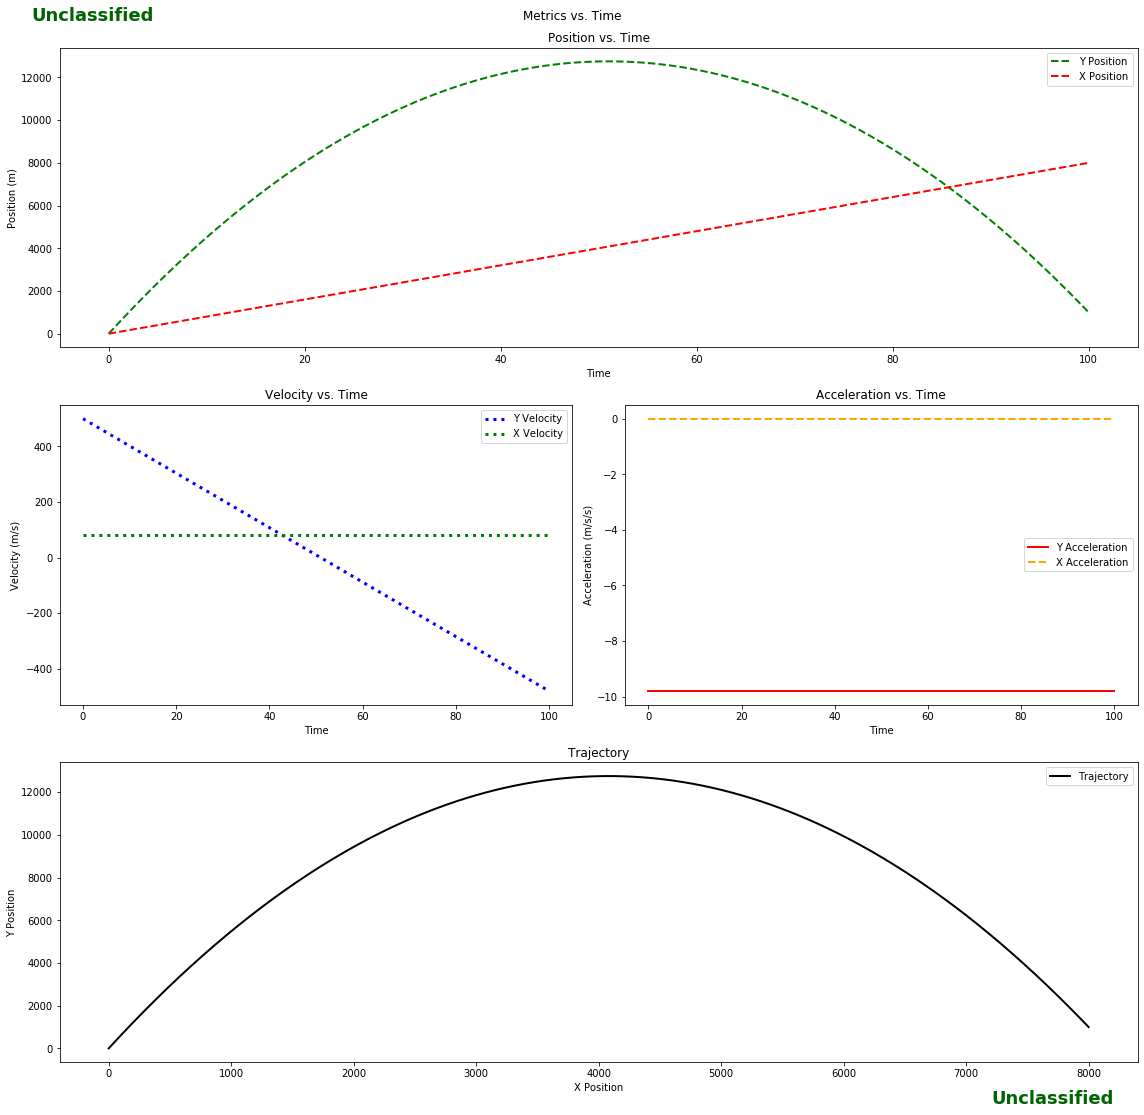

In [3]:
# Instantiate the Plotter class and store it as pltr
# We will also add a figure title, classification, and figure size

pltr = Plotterator.Plotter(title='Metrics vs. Time',classy='Unclassified',figsize=(16,16))

# add a subplot with id (0,0).  (0,0) tells plotterator where to put the plot on the figure.
# We will also make this plot span 2 columns.

ax1 = pltr.add_subplot((0,0),rowspan=1,colspan=2)

# Now we instanciate the plot type, and add in the data [YPos vs Time]
# Tell Plotterator with axis to put this on by the kwarg axid
# We can control the color with the kwarg c
# We can control the line width with the kwarg lw
# We can control the line style with the kwarg ls
# We can give the line a label with the kwarg label [This is the string that shows up in the legend]

pltr.plot(data['Time'],data['YPos'],axid=ax1,c='green',lw=2,ls='--',label='Y Position')

# We can also add another line to this axis by making another plot call.  Let's add XPos

pltr.plot(data['Time'],data['XPos'],axid=ax1,c='red',lw=2,ls='--',label='X Position')

# We are now going to make a legend for this axis.

pltr.parseCommand(ax1,'legend',[[]])

# We now give this axis it's own title

pltr.parseCommand(ax1,'set_title',[['Position vs. Time']])

# Give it x and y labels

pltr.parseCommand(ax1,'set_xlabel',[['Time']])
pltr.parseCommand(ax1,'set_ylabel',[['Position (m)']])

# Now lets add a second plot to the figure.  This time we will give it the id (1,0) and only span 1 column
ax2 = pltr.add_subplot((1,0))

# Now we can instantiate the plot type, and add in the data [YVel vs Time]
# along with some kwargs for customization
pltr.plot(data['Time'],data['YVel'],axid=ax2,c='blue',lw=3,ls=':',label='Y Velocity')
pltr.plot(data['Time'],data['XVel'],axid=ax2,c='green',lw=3,ls=':',label='X Velocity')

# Now to add similar commands as in ax1
pltr.parseCommand(ax2,'legend',[[]])
pltr.parseCommand(ax2,'set_title',[['Velocity vs. Time']])
pltr.parseCommand(ax2,'set_xlabel',[['Time']])
pltr.parseCommand(ax2,'set_ylabel',[['Velocity (m/s)']])

# Now for a 3rd!  Similar to the above.  Now data will be YAcc vs Time and XAcc vs Time
ax3 = pltr.add_subplot((1,1))
pltr.plot(data['Time'],data['YAcc'],axid=ax3,c='red',lw=2,ls='-',label='Y Acceleration')
pltr.plot(data['Time'],data['XAcc'],axid=ax3,c='orange',lw=2,ls='--',label='X Acceleration')

pltr.parseCommand(ax3,'legend',[])
pltr.parseCommand(ax3,'set_title',[['Acceleration vs. Time']])
pltr.parseCommand(ax3,'set_xlabel',[['Time']])
pltr.parseCommand(ax3,'set_ylabel',[['Acceleration (m/s/s)']])

# Now for a 4th!
ax4 = pltr.add_subplot((2,0),1,2)
pltr.plot(data['XPos'],data['Trajectory'],axid=ax4,c='black',lw=2,ls='-',label='Trajectory')
pltr.parseCommand(ax4,'legend',[])
pltr.parseCommand(ax4,'set_title',[['Trajectory']])
pltr.parseCommand(ax4,'set_xlabel',[['X Position']])
pltr.parseCommand(ax4,'set_ylabel',[['Y Position']])

# Now we want to show the plot

pltr.createPlot('',PERSIST = True)
